# Chapter 9: Image Classification with Torchvision

Installation Notes
To run this notebook on Google Colab, you will need to install the following libraries: transformers, evaluate, and split-folders.

In Google Colab, you can run the following command to install these libraries:

In [ ]:
!pip install transformers evaluate split-folders

Moreover, the get_image_from_url() and show() functions can be easily imported from a set of helper functions we're making available for your convenience. You can download it from the following link:

https://raw.githubusercontent.com/lftraining/LFD273-code/main/helper_functions.py

In Google Colab, you can run the following command to download the file:

In [ ]:
!wget https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/helper_functions.py

Once the file is downloaded, you only need to import the required helper function:

In [ ]:
from helper_functions import get_image_from_url, show

## 9.2 Learning Objectives

By the end of this chapter, you should be able to:
- use pretrained models as feature extractors
- build a dataset of preprocessed features
- train a classifier head and combine it with the underlying feature extractor
- run evaluation metrics using HuggingFace's evaluate package

## 9.3 Torchvision

The Torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision. We've already discussed and used some of its models in "Transfer Learning and Pretrained Models".

### 9.3.1 Models

The package has many available [models for computer vision](https://pytorch.org/vision/stable/models.html) split among different tasks:
- [image classification](https://pytorch.org/vision/stable/models.html#classification)
- [semanting segmentation](https://pytorch.org/vision/stable/models.html#semantic-segmentation)
- [object detection](https://pytorch.org/vision/stable/models.html#object-detection)
- [instance segmentation](https://pytorch.org/vision/stable/models.html#instance-segmentation)
- [person keypoint detection](https://pytorch.org/vision/stable/models.html#keypoint-detection)
- [video classification](https://pytorch.org/vision/stable/models.html#video-classification)
- [optical flow](https://pytorch.org/vision/stable/models.html#optical-flow)


In this and the chapters that follow, we'll show you examples of models for image classification, object detection, and instance segmentation. We'll be using pretrained weights available on Torchvision, but please keep in mind that models may have their own licenses, as stated in the repository:

***
_**Pre-trained Model License**: The pre-trained models provided in this library may have their own licenses or terms and conditions derived from the dataset used for training. It is your responsibility to determine whether you have permission to use the models for your use case._

Source: [Torchvision repository](https://github.com/pytorch/vision)
***

#### Models:-

- Image Classification
There are several models for image classification that we have already discussed briefly in "Transfer Learning and Pretrained Models": AlexNet, VGG, ResNet (family of models), and Inception V3. There are also many more models, such as MobileNet and Vision Transformer. Although we won't be covering them all here, you should be able to use them with minor adjustments, if any, based on what you'll learn in this chapter.

- Object Detection and Instance Segmentation
The availability of models for object detection and instance segmentation is much more reduced, especially when compared to a large number of available models for image classification. The more popular ones for object detection are Faster R-CNN and SSD (Single-Shot Detector), and a variation of the former, Mask R-CNN, is the only available model for instance segmentation. For this reason, we'll be focusing on the R-CNN family of models in this course.

### 9.3.3 Datasets

####Torchvision: Datasets
Torchvision provides many built-in [datasets](https://pytorch.org/vision/stable/datasets.html), as well as utility classes for building your own datasets. All datasets are subclasses of PyTorch's Dataset class and, more specifically, subclasses of the VisionDataset, which is used as the base class for Torchvision-compatible datasets.

As it is typical for datasets in general, they implement both `__getitem__()` and `__len__()` methods. Their constructor method, `__init__()`, typically takes an argument for the root folder containing the images, and three arguments for transformations: `transforms`, `transform`, and `target_transform`. The first argument and the other two are mutually exclusive, though. We'll understand the reasoning behind this particularity later on.

We'll use a couple of built-in datasets from Torchvision, but please keep in mind that these datasets aren't hosted by PyTorch, and they may also have their own licenses, as stated in the repository:

***
_**Disclaimer on Datasets**: This is a utility library that downloads and prepares public datasets. We do not host or distribute these datasets, vouch for their quality or fairness, or claim that you have license to use the dataset. It is your responsibility to determine whether you have permission to use the dataset under the dataset's license._

Source: [Torchvision repository](https://github.com/pytorch/vision)
***

There are plenty of datasets available, especially for the most popular computer vision tasks, namely, image classification, detection, and segmentation.

#### 9.3.3.1 Image Classification

Here you'll find the most popular and dataset for computer vision of all time: [MNIST](http://yann.lecun.com/exdb/mnist/), and its variations, EMNIST, FashionMNIST, QMNIST, and KMNIST. You'll also find classes for ImageNet, CIFAR10, Flowers102, CelebA, and Oxford IIIT Pet (which we'll be using later). Keep in mind that the availability of a class doesn't mean the data itself is readily and freely available. You may need to request permission to download the dataset (e.g. ImageNet dataset), or the data may be already gone (e.g. StanfordCars dataset at the time of writing).

#### 9.3.3.2 Image Detection or Segmentation

You'll find a few datasets that were already showing up in the image classification section, such as CelebA and Oxford IIIT Pet datasets, but also other typical datasets used for object detection, such as CocoDetection and VOCDetection (from COCO and Pascal VOC challenges, which we'll discuss further in "Object Detection Evaluation").

### 9.3.4 A More Concrete Dataset

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step1.png)

We'll focus on a real-world dataset, one that's more concrete, literally speaking: ["Concrete Crack Image for Classification"](https://data.mendeley.com/datasets/5y9wdsg2zt/2) by Özgenel, Ç. F., and Gönenç Sorguç, A., licensed under [CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/). Its descriptions reads:

"*The dataset contains concrete images having cracks. The data is collected from various METU Campus Buildings.
The dataset is divided into two as negative and positive crack images for image classification.
Each class has 20000 images with a total of 40000 images with 227 x 227 pixels with RGB channels.
The dataset is generated from 458 high-resolution images (4032x3024 pixel) with the method proposed by Zhang et al (2016).
High-resolution images have variance in terms of surface finish and illumination conditions.
No data augmentation in terms of random rotation or flipping is applied.*"

#### 9.3.4.1 Preparing the Dataset

A More Concrete Dataset: Preparing the Dataset
If you wish, you may prepare the dataset from scratch, performing the train-validation-test split yourself. Alternatively, you can download an already prepared dataset that was made available for your convenience (please see the next section for details).

You can retrieve the original dataset from the following link:

https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip

Inside the zip file, you'll find another RAR-compressed file, Concrete Crack Images for Classification.rar. Uncompressing the RAR file will create two folders: Negative and Positive. However, it is better to move both folders inside a concrete root folder, before moving on to splitting the dataset.

In Google Colab, you may perform all these operations using the sequence of commands below:

In [ ]:
!wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/5y9wdsg2zt-2.zip
!unzip 5y9wdsg2zt-2.zip
!unrar x 'Concrete Crack Images for Classification.rar'
!mkdir concrete && mv ./Negative ./concrete && mv ./Positive ./concrete

The dataset is originally divided into two folders: Positive (images with cracks) and Negative (images without cracks). To make the dataset easier to use here, we split the existing images into three folders, train, val, and test, each containing 16,000, 2,000, and 2,000 images, respectively. Under each split, the images are evenly divided into Positive and Negative subfolders.

We used the split-folders Python package, in case you'd like to perform the split again, perhaps using different ratios (assuming the original folders were unzipped in the concrete folder):

In [ ]:
import splitfolders
splitfolders.ratio("concrete",
                   output="concrete_dataset",
                   seed=1337,
                   ratio=(.8, .1, .1),
                   group_prefix=None,
                   move=True)

#### 9.3.4.2 Already Prepared Dataset

#####A More Concrete Dataset: Already Prepared Dataset
You can download the dataset already split into folders from the following link:

https://github.com/lftraining/LFD273-code/releases/download/dataset/concrete.tar.gz

Once it's downloaded, you need to uncompress it and rename the extracted dataset folder to concrete_dataset.

In Google Colab, you may perform these operations using the sequence of commands below:

In [ ]:
!wget https://github.com/dvgodoy/assets/releases/download/dataset/concrete.tar.gz
!tar -xvzf concrete.tar.gz && mv dataset/ concrete_dataset/

Let's take a quick look at the images.

### 9.3.5 I/O and Utilities

Torchvision: I/O and Utilities
Torchvision has several I/O and utility functions to help you manipulate and visualize images (and videos). Two commonly used functions are read_image() and make_grid().

The read_image() function reads a JPEG or PNG image from a given path, and returns a tensor in channels-first PyTorch format (CHW). The images are loaded "as is" in the default reading mode ImageReadMode.UNCHANGED, but you may also convert the image to grayscale (GRAY), with transparency (GRAY_ALPHA), or RGB (RGB), also with transparency (RGB_ALPHA).

Torchvision has several [I/O](https://pytorch.org/vision/main/io.html) and [utility](https://pytorch.org/vision/main/utils.html) functions to help you manipulate and visualize [images](https://pytorch.org/vision/main/io.html#image) (and [videos](https://pytorch.org/vision/main/io.html#video)).

In [ ]:
from torchvision.io import read_image

train_folder = './concrete_dataset/train'
filepath = f'{train_folder}/Positive/00001.jpg'
image_tensor = read_image(filepath)
image_tensor, image_tensor.shape

(tensor([[[130, 131, 134,  ..., 138, 138, 138],
          [132, 133, 134,  ..., 138, 138, 138],
          [136, 135, 135,  ..., 138, 138, 138],
          ...,
          [137, 138, 138,  ..., 139, 139, 139],
          [137, 138, 138,  ..., 139, 139, 139],
          [137, 138, 138,  ..., 139, 139, 139]],
 
         [[134, 135, 138,  ..., 140, 140, 140],
          [136, 137, 138,  ..., 140, 140, 140],
          [140, 139, 139,  ..., 140, 140, 140],
          ...,
          [138, 139, 139,  ..., 141, 141, 141],
          [138, 139, 139,  ..., 141, 141, 141],
          [138, 139, 139,  ..., 141, 141, 141]],
 
         [[135, 136, 139,  ..., 139, 139, 139],
          [137, 138, 139,  ..., 139, 139, 139],
          [141, 140, 140,  ..., 139, 139, 139],
          ...,
          [140, 141, 141,  ..., 140, 140, 140],
          [140, 141, 141,  ..., 140, 140, 140],
          [140, 141, 141,  ..., 140, 140, 140]]], dtype=torch.uint8),
 torch.Size([3, 227, 227]))

As you can see, the pixel values were loaded "as is" as a tensor in CHW format. The images of concrete are colored (three channels), 227x227 pixels in size.

We may also use make_grid() to make a grid of a mini-batch or list of images with the same size, so we can show them side-by-side, as many in a row as defined by the somewhat misleadingly-named nrow argument.

Let's make a grid out of eight images in the Positive folder of our training data:

In [ ]:
import os
from torchvision.utils import make_grid

fnames = os.listdir(f'{train_folder}/Positive')[:8]
images = [read_image(f'{train_folder}/Positive/{fname}') for fname in fnames]
image_grid = make_grid(images, nrow=4)
image_grid, image_grid.shape

(tensor([[[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0, 133,  ..., 159,   0,   0],
          ...,
          [  0,   0, 193,  ..., 170,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]],
 
         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0, 130,  ..., 155,   0,   0],
          ...,
          [  0,   0, 181,  ..., 167,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]],
 
         [[  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0, 123,  ..., 154,   0,   0],
          ...,
          [  0,   0, 165,  ..., 162,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]], dtype=torch.uint8),
 torch.Size([3, 460, 918]))

It returns a single tensor that is the result of concatenating together all the images in two rows of four images each.

Let's use the write_png() function to write the result to a PNG file:

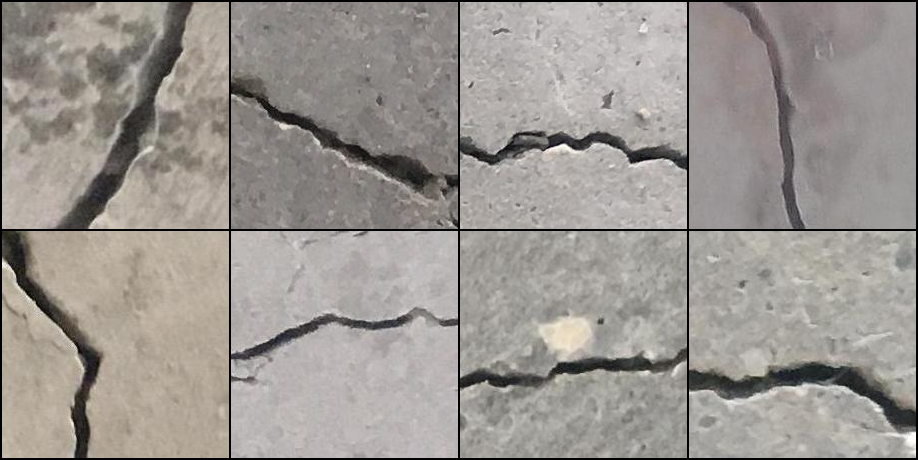

In [ ]:
from torchvision.io import write_png
from PIL import Image

write_png(image_grid, 'positive_grid.png')
Image.open('positive_grid.png')

Cracked Concrete. Images retrieved from ["Concrete Crack Image for Classification"](https://data.mendeley.com/datasets/5y9wdsg2zt/2)



These are cracked, indeed!

Let's take a look at some neat, uncracked, pieces of concrete too:

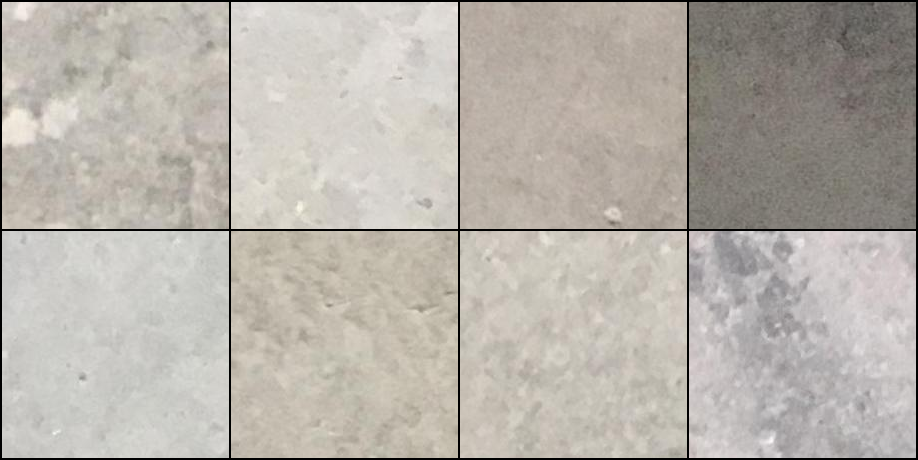

In [ ]:
fnames = os.listdir(f'{train_folder}/Negative')[:8]
images = [read_image(f'{train_folder}/Negative/{fname}') for fname in fnames]
image_grid = make_grid(images, nrow=4)
write_png(image_grid, 'negative_grid.png')
Image.open('negative_grid.png')

Solid Concrete. Images retrieved from "Concrete Crack Image for Classification"

## 9.4 Pretrained Models as Feature Extractors

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch7/features1.png)
Source: [“Unsupervised Learning of Hierarchical Representations with Convolutional Deep Belief Networks”](https://web.eecs.umich.edu/~honglak/icml09-ConvolutionalDeepBeliefNetworks.pdf) by Honglak Lee and colleagues (2011)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch7/features2.png)
Source: [“Unsupervised Learning of Hierarchical Representations with Convolutional Deep Belief Networks”](https://web.eecs.umich.edu/~honglak/icml09-ConvolutionalDeepBeliefNetworks.pdf) by Honglak Lee and colleagues (2011)

### 9.4.1 Feature Extractor

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step3.png)

In [ ]:
import torch
from torchvision.models import get_weight

repo = 'pytorch/vision'
weights = get_weight('ResNet18_Weights.DEFAULT')
model = torch.hub.load(repo, 'resnet18', weights=weights)
model

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 129MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torchvision.models.feature_extraction import get_graph_node_names

# layers in order of execution - train and eval modes
train_nodes, eval_nodes = get_graph_node_names(model)
train_nodes

['x',
 'conv1',
 'bn1',
 'relu',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.relu',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.add',
 'layer1.0.relu_1',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.relu',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.add',
 'layer1.1.relu_1',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.relu',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0.add',
 'layer2.0.relu_1',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.relu',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer2.1.add',
 'layer2.1.relu_1',
 'layer3.0.conv1',
 'layer3.0.bn1',
 'layer3.0.relu',
 'layer3.0.conv2',
 'layer3.0.bn2',
 'layer3.0.downsample.0',
 'layer3.0.downsample.1',
 'layer3.0.add',
 'layer3.0.relu_1',
 'layer3.1.conv1',
 'layer3.1.bn1',
 'layer3.1.relu',
 'layer3.1.conv2',
 'layer3.1.bn2',
 'layer3.1.add',
 'layer3.1.relu_1',
 'layer4.0.conv1',
 'layer4.0.bn1',
 'layer4.0.relu',
 'layer4.0.conv2',
 'layer4.0.bn2',

In [ ]:
return_nodes = {
    'flatten': 'features',
}

In [ ]:
from torchvision.models.feature_extraction import create_feature_extractor

headless_model = create_feature_extractor(model, return_nodes=return_nodes)
headless_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Module(
    (0): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Module(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2):

In [ ]:
activations = headless_model(torch.randn(1, 3, 224, 224))
type(activations), activations.keys()

(dict, dict_keys(['features']))

In [ ]:
activations['features'].shape

torch.Size([1, 512])

### 9.4.2 Preprocessed Dataset

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step4.png)

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms as T

weights = get_weight('ResNet18_Weights.DEFAULT')
transforms_fn = weights.transforms()

datasets = {}
dataloaders = {}
datasets['train'] = ImageFolder(root='./concrete_dataset/train', transform=transforms_fn)
dataloaders['train'] = DataLoader(datasets['train'], batch_size=32)

In [ ]:
from torch.utils.data import TensorDataset

def preprocess_dataset(model, loader, device=None, key=None):
    # If a device is not given, finds in which device the
    # model was loaded on
    if device is None:
        device = next(iter(model.parameters())).device

    features = None
    labels = None

    for i, (x, y) in enumerate(loader):
        # Sets model to evaluation mode
        model.eval()
        # Send input to the same device as the model
        x = x.to(device)
        # Makes predictions
        output = model(x)

        # If the output produced by the model is a dictionary
        # assumes the first key contains the predictions
        if isinstance(output, dict):
            if key is None:
                key = output.keys()[0]
            output = output[key]

        # If it is the first mini-batch, use the output and labels
        # as starting points
        if i == 0:
            features = output.detach().cpu()
            labels = y.cpu()
        # otherwise concatenate them with previous tensors
        else:
            features = torch.cat([features, output.detach().cpu()])
            labels = torch.cat([labels, y.cpu()])

    dataset = TensorDataset(features, labels)
    return dataset

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

headless_model.to(device)
preprocessed_datasets = {}
preprocessed_datasets['train'] = preprocess_dataset(headless_model, dataloaders['train'], device, 'features')
preprocessed_datasets['train']

In [ ]:
(preprocessed_datasets['train'].tensors,
 preprocessed_datasets['train'].tensors[0].shape,
 preprocessed_datasets['train'].tensors[1].shape)

((tensor([[0.0227, 0.0891, 0.0017,  ..., 0.0042, 0.0142, 0.1939],
          [0.1045, 0.0337, 0.0300,  ..., 0.0000, 0.0000, 0.0324],
          [0.1127, 0.1702, 0.1946,  ..., 0.5687, 0.4084, 0.0465],
          ...,
          [0.6585, 0.8275, 0.6698,  ..., 0.2021, 0.8161, 0.0074],
          [0.0410, 1.0510, 0.0621,  ..., 0.2737, 1.1039, 0.5036],
          [0.1797, 0.1010, 0.0596,  ..., 0.4915, 1.5862, 0.0985]]),
  tensor([0, 0, 0,  ..., 1, 1, 1])),
 torch.Size([32000, 512]),
 torch.Size([32000]))

In [ ]:
for split in ['val', 'test']:
    datasets[split] = ImageFolder(root=f'./concrete_dataset/{split}', transform=transforms_fn)
    dataloaders[split] = DataLoader(datasets[split], batch_size=32)
    preprocessed_datasets[split] = preprocess_dataset(headless_model, dataloaders[split], device, 'features')

In [ ]:
tensors_only = {split: preprocessed_datasets[split].tensors for split in ['train', 'val', 'test']}
tensors_only

{'train': (tensor([[0.0227, 0.0891, 0.0017,  ..., 0.0042, 0.0142, 0.1939],
          [0.1045, 0.0337, 0.0300,  ..., 0.0000, 0.0000, 0.0324],
          [0.1127, 0.1702, 0.1946,  ..., 0.5687, 0.4084, 0.0465],
          ...,
          [0.6585, 0.8275, 0.6698,  ..., 0.2021, 0.8161, 0.0074],
          [0.0410, 1.0510, 0.0621,  ..., 0.2737, 1.1039, 0.5036],
          [0.1797, 0.1010, 0.0596,  ..., 0.4915, 1.5862, 0.0985]]),
  tensor([0, 0, 0,  ..., 1, 1, 1])),
 'val': (tensor([[0.0000e+00, 4.8005e-02, 5.7792e-04,  ..., 2.0283e-03, 1.4154e-03,
           2.1872e-05],
          [2.9983e-03, 1.6763e-01, 2.0757e-02,  ..., 0.0000e+00, 0.0000e+00,
           3.8599e-03],
          [1.0488e-01, 7.6243e-02, 1.9473e-01,  ..., 5.9086e-01, 0.0000e+00,
           1.3055e-02],
          ...,
          [3.2929e-01, 1.0850e+00, 1.7993e+00,  ..., 3.2725e-01, 8.4750e-01,
           1.5091e+00],
          [1.6172e-01, 4.4449e-01, 5.7581e-01,  ..., 7.7741e-02, 1.1706e+00,
           1.4460e-01],
          [1.3

In [ ]:
torch.save(tensors_only, 'concrete_preprocessed.pth')

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/data_step5.png)

In [ ]:
preprocessed_dataloaders = {}
for split in ['train', 'val', 'test']:
    preprocessed_dataloaders[split] = DataLoader(preprocessed_datasets[split], batch_size=32, shuffle=(split == 'train'))

### 9.4.3 Training a Classifier Head

**ASIDE**: "*Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.*"

Source: [Getting Started - Scikit-Learn](https://scikit-learn.org/stable/getting_started.html)

The library provides several built-in machine learning algorithms and models. Unlike PyTorch, you can call their `fit()` method to train the model, as opposed to writing your own training loop. The `fit()` method takes two arguments:

- the feature matrix `X`, a Numpy array usually in the shape `(n_samples, n_features)`
- the target `y` (floats for regression tasks or integers for classification tasks), a Numpy array usually in the shape `(n_features, 1)`.

Once the model is fitted (trained), you can make predictions using its `predict()` method.


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, solver='newton-cholesky') # n_samples >> n_features
X_train = tensors_only['train'][0].numpy()
y_train = tensors_only['train'][1].numpy()
clf.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='newton-cholesky')

In [ ]:
X_val = tensors_only['val'][0].numpy()
y_val = tensors_only['val'][1].numpy()

(clf.predict(X_val) == y_val).sum() / X_val.shape[0]

0.9985

In [ ]:
wrong_idx = np.where(clf.predict(X_val) != y_val)[0]
wrong_idx

array([ 221, 1064, 1495, 1497, 3075, 3422])

In [ ]:
wrong_images = np.array(datasets['val'].imgs)[wrong_idx]
wrong_images

array([['./concrete_dataset/val/Negative/02432.jpg', '0'],
       ['./concrete_dataset/val/Negative/10685.jpg', '0'],
       ['./concrete_dataset/val/Negative/15100.jpg', '0'],
       ['./concrete_dataset/val/Negative/15142.jpg', '0'],
       ['./concrete_dataset/val/Positive/10796_1.jpg', '1'],
       ['./concrete_dataset/val/Positive/14427_1.jpg', '1']], dtype='<U43')

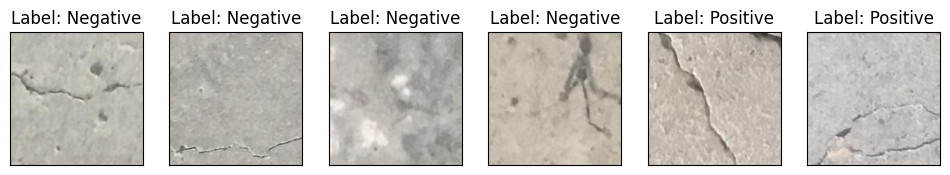

In [ ]:
fig = show([Image.open(img) for img in wrong_images[:, 0]], [f'Label: {"Positive" if int(l) else "Negative"}' for l in wrong_images[:, 1]])
fig.set_size_inches(12, 8)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

|                         | BCE Loss               | BCE With Logits Loss     | NLL Loss                    | Cross-Entropy Loss   
| --- | --- | --- | --- | --- |
|     Classification      | binary                | binary                | multiclass / binary                | multiclass / binary
| Model output (each data point) | probability           | logit                 | array of two or more log probabilities | array of two or more logits    
| Label (each data point) | float (0.0 or 1.0)    | float (0.0 or 1.0)    | long (class index)         | long (class index)
|   Model's last layer    | Sigmoid               | Linear                | LogSoftmax                 | Linear              

In [ ]:
import torch.optim as optim
import torch.nn as nn

torch.manual_seed(42)

head = nn.Linear(512, 1)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step2.png)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

In [ ]:
batch_features, batch_targets = preprocessed_datasets['train'][:8]
batch_targets

tensor([0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
bad_predictions = head(batch_features)
bad_predictions

tensor([[-0.5276],
        [-0.3818],
        [-0.4256],
        [-0.6324],
        [-0.4481],
        [-0.5714],
        [-0.2978],
        [-0.3851]], grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn(bad_predictions, batch_targets)

ValueError: ignored

In [ ]:
batch_targets = batch_targets.unsqueeze(1)
batch_targets

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])

In [ ]:
loss_fn(bad_predictions, batch_targets)

RuntimeError: ignored

In [ ]:
loss_fn(bad_predictions, batch_targets.float())

tensor(0.4911, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step3.png)

In [ ]:
# Suggested learning rate
lr = 3e-4

optimizer = optim.Adam(head.parameters(), lr=lr)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step4.png)

In [ ]:
from tqdm import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'

head.to(device)

batch_losses = []

## Training
for i, (batch_features, batch_targets) in tqdm(enumerate(preprocessed_dataloaders['train'])):
    model.train()

    batch_features = batch_features.to(device)
    batch_targets = batch_targets.unsqueeze(1).float().to(device)

    # Step 1 - forward pass
    predictions = head(batch_features)

    # Step 2 - computing the loss
    loss = loss_fn(predictions, batch_targets)

    # Step 3 - computing the gradients
    loss.backward()
    batch_losses.append(loss.item())

    # Step 4 - updating parameters and zeroing gradients
    optimizer.step()
    optimizer.zero_grad()

1000it [00:01, 600.41it/s]


### 9.4.4 Evaluation Metrics

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step5.png)

Let's suppose 1% of credit card transactions are fraudulent. If our dataset has 100,000 transactions, we expect roughly 1,000 of them to be fradulent.

```python
def is_fraudulent(features):
    return False
```

Besides accuracy, it is typical to evaluate classification models using precision and recall. The former tells you, from all the positive predictions, how many did the model get right. The latter, from all actual positive data points, how many did the model get right (or "recalled" if you will).

#### 9.4.4.1 Confusion Matrix

Before going into more details, let's make sure we're not confused about the terminology:
- if the label is positive, and the model prediction is also positive, it is a True Positive (TP)
- if the label is positive, but the model prediction is negative, it is a False Negative (FN)
- if the label is negative, and the model prediction is also negative, it is a True Negative (TN)
- if the label is negative, but the model prediction is positive, it is a False Positive (FP)

We can actually organize these four cases into a nice matrix:

|                         | Predicted Negative               | Predicted Positive    
| --- | --- | --- |
|    Actual Negative      | TN                | FP             
|    Actual Positive      | FN                | TP

#### 9.4.4.2 Accuracy

$$
\Large
\text{Accuracy}=\frac{\text{TP+TN}}{\text{TP+TN+FP+FN}}
$$

#### 9.4.4.3 Precision and Recall

$$
\Large
\text{Precision}=\frac{\text{TP}}{\text{TP+FP}}
$$

$$
\Large
\text{Recall}=\frac{\text{TP}}{\text{TP+FN}}
$$

#### 9.4.4.4 Classification Threshold

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch7/one_logit.png)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch7/sigmoid.png)

In [ ]:
threshold = 0.5
probability = torch.sigmoid(predictions)
pred_class = probability > threshold

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(batch_targets.tolist(), pred_class.tolist())

array([[16,  0],
       [ 0, 16]])

In [ ]:
new_threshold = 0.95
pred_class = probability > new_threshold

confusion_matrix(batch_targets.tolist(), pred_class.tolist())

array([[16,  0],
       [ 1, 15]])

Increasing a threshold, as we did above, means we're more strict when it comes to calling a prediction "positive", that is, we don't like false positives.

We're moving points from the right column to the left column: some false positives (FP) become true negatives (TN) but some true positives (TP) may also become false negatives (FN).

Decreasing TP and increasing FN will negatively impact recall. Decreasing FP, even if we're decreasing TP as well, will positively impact precision.

Decreasing a threshold means we're more relaxed when it comes to calling a prediction "positive", that is, we don't like false negatives (as in our case about cracks in concrete).

We're moving points from the left column to the right column: some true negatives (TN) becomes false positives (FP) but some false negatives (FN) may also become true positives (TP).

Decreasing FN and increasing TP will improve recall, while increasing FP, even if we're increasing TP as well, will negatively impact precision.

In summary, if you'd like to:
- avoid false negatives (FN), decrease the threshold to improve recall
- avoid false positives (FP), increase the threshold to improve precision

#### 9.4.4.5 Evaluate

***
**ASIDE**: [Evaluate](https://huggingface.co/docs/evaluate/index), from HuggingFace, is "_a library for easily evaluating machine learning models and datasets_."

It supports several evaluation methods for different domains, including Computer Vision and NLP, but you can also use it to compute generic metrics for classification, such as accuracy, precision, and recall.
***

In [ ]:
import evaluate

metrics = evaluate.combine(["accuracy", "precision", "recall"])

In [ ]:
head.eval()

for features, targets in preprocessed_dataloaders['val']:
    pred = head(features.to(device))
    probability = torch.sigmoid(pred).squeeze()
    threshold = 0.5
    pred_class = (probability > threshold).int()
    metrics.add_batch(references=targets.tolist(), predictions=pred_class.tolist())

In [ ]:
metrics.compute()

{'accuracy': 0.9925, 'precision': 0.9934869739478958, 'recall': 0.9915}

### 9.4.5 Reattaching the Head

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

In [ ]:
weights = get_weight('ResNet18_Weights.DEFAULT')
transforms_fn = weights.transforms()

repo = 'pytorch/vision'
model = torch.hub.load(repo, 'resnet18', weights=weights)
model.fc = head
model.to(device)

Using cache found in /root/.cache/torch/hub/pytorch_vision_main


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step5.png)

In [ ]:
def predict(path_or_url, model, transforms_fn, categories, topk=1, headers=None):
    if path_or_url.startswith('http'):
        img = get_image_from_url(path_or_url, headers=headers)
    else:
        img = Image.open(path_or_url)

    # Preprocesses the image using the transforms_fn
    preproc_img = transforms_fn(img)
    # If there are only three dimensions (CHW), unsqueeze the first
    # to get a mini-batch of one (NCHW)
    if len(preproc_img.shape) == 3:
        preproc_img = preproc_img.unsqueeze(0)

    # Never forget to set the model to evaluation mode!
    model.eval()
    # We find in which device the model is loaded on
    # and send the preprocessed image to the same device
    # to get predictions from the model
    device = next(iter(model.parameters())).device
    pred = model(preproc_img.to(device))

    # If the output is a dictionary, extract logits from it
    if isinstance(pred, dict):
        pred = pred['logits']

    # Binary classification
    is_binary = (pred.shape[1] == 1)
    if is_binary:
        # Uses sigmoid function to convert predicted logits into probabilities
        probability = torch.sigmoid(pred).squeeze()
        # In binary classification, we need to use a threshold to determine if
        # it is a positive or a negative class
        threshold = 0.5
        pred_class = probability > threshold
        values = (1-probability) if (probability <= threshold) else probability
        return [{'label': categories[pred_class], 'value': values.tolist()}]
    # Multi-class classification
    else:
        # Uses softmax function to convert predicted logits into probabilities
        probabilities = torch.nn.functional.softmax(pred[0], dim=0)
        # In multi-class classification, we may take the top-k results only
        values, indices = torch.topk(probabilities, topk)
        return [{'label': categories[i], 'value': v.item()} for i, v in zip(indices, values)]

In [ ]:
!wget https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch7/cracked_drywall.jpg

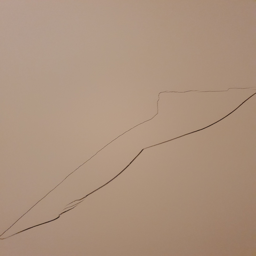

In [ ]:
Image.open('./cracked_drywall.jpg').resize((256, 256))

In [ ]:
predict('./cracked_drywall.jpg', model, transforms_fn, ['Negative', 'Positive'])

[{'label': 'Positive', 'value': 0.999718964099884}]